<a href="https://colab.research.google.com/github/CristinaMarsh/Reproduce/blob/main/Geoscience/Reproduce_for_paper_Extreme_rainfall_triggered_the_2018_rift_eruption_at_K%C4%ABlauea_Volcano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.nature.com/articles/s41586-020-2172-5



This problem involves a one-dimensional diffusion equation that describes the vertical flow of groundwater under the influence of rainfall. We can solve this using a finite difference method. The domain is discretized into grid points and the differential equation is approximated by finite differences at these grid points.
From the description provided, the system is split into two domains. The uppermost domain ( 0 to $500 \mathrm{~m}$ ) is highly permeable and porous with $k=1 \times 10^{-12} \mathrm{~m}^2$ and $\phi=0.3$. The underlying portion (deeper than $500 \mathrm{~m}$ ) is less permeable with $k=6 \times 10^{-15} \mathrm{~m}^2$ and less porous with $\phi=0.2$. The total depth is given as $Z=10 \mathrm{~km}$. The viscosity, $\mu$, is assumed to be constant at $8.9 \times 10^{-4} P a . s^{-1}$, and the bulk modulus, $K$, is given as $10 G P a$.

The boundary condition at the surface $(z=0)$ is given by $p(z=0, t)=\Lambda \varrho_w g h(t)$, where $\Lambda=5.12$ is the calibration factor, $\varrho_w$ is the density of water (which we can take as $1000 \mathrm{~kg} / \mathrm{m}^3$ ), and $g$ is the acceleration due to gravity (which we can take as $9.81 \mathrm{~m} / \mathrm{s}^2$ ). $h(t)$ is the calibrated height of recorded rainfall.
The boundary condition at the base ( $Z=10 \mathrm{~km}$ ) is a zero-flux boundary, which means the pressure change at the base is zero, i.e., $\partial p /\left.\partial z\right|_{z=Z}=0$.

The initial condition can be taken as $p(z, t=0)=0$, indicating zero pressure at all depths at time $t=0$.
The finite difference approximation of the partial differential equation is given by:
$$
\frac{p_i^{n+1}-p_i^n}{\Delta t}=D\left(\frac{p_{i+1}^n-2 p_i^n+p_{i-1}^n}{\Delta z^2}\right)
$$

where $D=k K / \mu \phi$ is the diffusion coefficient, $p_i^n$ is the pressure at grid point $i$ and time $n$ , and $\Delta t$ and $\Delta z$ are the time and space steps, respectively.
This equation can be rearranged to solve for the pressure at the next time step, $p_i^{n+1}$ :
$$
p_i^{n+1}=p_i^n+D \Delta t\left(\frac{p_{i+1}^n-2 p_i^n+p_{i-1}^n}{\Delta z^2}\right)
$$
The boundary conditions are applied as $p_0^n=\Lambda \varrho_w g h^n$ and $p_N^{n+1}=p_{N-1}^{n+1}$, where $N$ is the last grid point.

Please note that the provided description did not specify the time dependence of the rainfall $h(t)$, so this needs to be specified or measured data should be provided.

Let me know if you need help implementing this in Python or if you have any other questions.

<ipython-input-3-6c62ae5d3833>:40: RuntimeWarning: overflow encountered in double_scalars
  p[n + 1, i] = p[n, i] + D[i] * dt * (p[n, i + 1] - 2 * p[n, i] + p[n, i - 1]) / dz**2
<ipython-input-3-6c62ae5d3833>:40: RuntimeWarning: invalid value encountered in double_scalars
  p[n + 1, i] = p[n, i] + D[i] * dt * (p[n, i + 1] - 2 * p[n, i] + p[n, i - 1]) / dz**2
/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


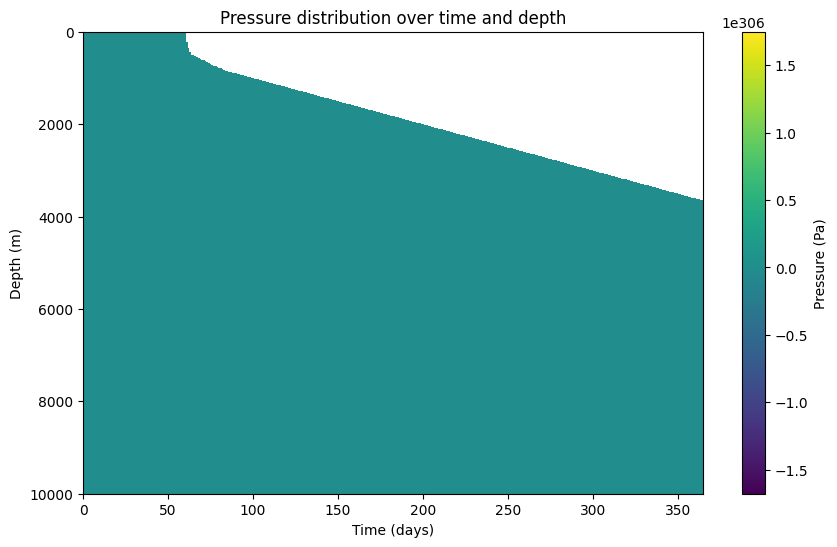

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k1 = 1e-12  # m^2, permeability in upper domain
phi1 = 0.3  # porosity in upper domain
k2 = 6e-15  # m^2, permeability in lower domain
phi2 = 0.2  # porosity in lower domain
mu = 8.9e-4  # Pa.s, viscosity of water
K = 10e9  # Pa, bulk modulus
rho_w = 1000  # kg/m^3, density of water
g = 9.81  # m/s^2, acceleration due to gravity
Lambda = 5.12  # calibration factor
Z = 10e3  # m, total depth
N = 1000  # number of grid points
dt = 60 * 60 * 24  # time step of one day in seconds
days = 365  # number of days to simulate
h = np.ones(days)  # m, rainfall height (one meter per day for simplicity)

# Space discretization
z = np.linspace(0, Z, N)
dz = z[1] - z[0]

# Time discretization
t = np.linspace(0, days * dt, days)
timesteps = len(t)

# Initialize pressure
p = np.zeros((timesteps, N))

# Compute diffusion coefficients
D = np.zeros(N)
D[z <= 500] = k1 * K / (mu * phi1)  # upper domain
D[z > 500] = k2 * K / (mu * phi2)  # lower domain

# Time stepping
for n in range(timesteps - 1):
    # Interior points
    for i in range(1, N - 1):
        p[n + 1, i] = p[n, i] + D[i] * dt * (p[n, i + 1] - 2 * p[n, i] + p[n, i - 1]) / dz**2
    # Boundary conditions
    p[n + 1, 0] = Lambda * rho_w * g * h[n]  # surface
    p[n + 1, -1] = p[n + 1, -2]  # base

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(p.T, extent=[0, days, Z, 0], aspect='auto')
plt.colorbar(label='Pressure (Pa)')
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Pressure distribution over time and depth')
plt.show()

In implicit methods, we use future time levels to update the current time level, which leads to a system of linear equations that needs to be solved at each time step. For this problem, the implicit finite difference approximation of the diffusion equation leads to the following equation:
$$
\frac{p_i^{n+1}-p_i^n}{\Delta t}=D\left(\frac{p_{i+1}^{n+1}-2 p_i^{n+1}+p_{i-1}^{n+1}}{\Delta z^2}\right)
$$
We can rearrange this equation to isolate $p_i^{n+1}$ on the left-hand side:
$$
-p_{i-1}^{n+1}+\left(2+D \Delta t / \Delta z^2\right) p_i^{n+1}-p_{i+1}^{n+1}=2 p_i^n
$$
This equation represents a tridiagonal system of linear equations of the form $A p^{n+1}=B p^n$ , where $A$ is a tridiagonal matrix and $B$ is the identity matrix. The boundary conditions modify the first and last equations in this system.
To solve this system of equations, we can use the 'scipy. linalg.solve' function, which uses LU decomposition under the hood. This is much more efficient than using the 'numpy.linalg.inv' function to compute the inverse of the matrix, which is not necessary and can be computationally expensive.
Let's implement this in Python.

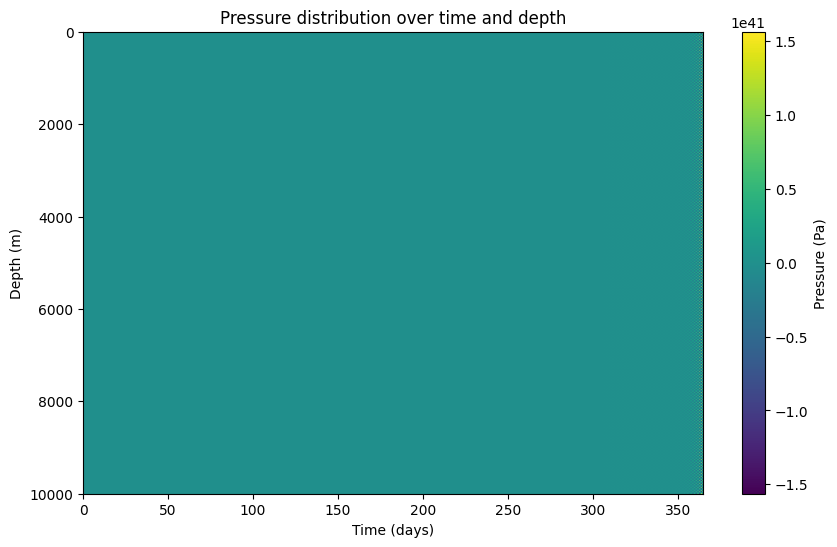

In [4]:
from scipy.linalg import solve
import numpy as np

# Time step
dt = 60 * 60 * 24  # time step of one day in seconds

# Time discretization
t = np.linspace(0, days * dt, days)
timesteps = len(t)

# Initialize pressure
p = np.zeros((timesteps, N))

# Coefficients of the tridiagonal matrix
a = np.zeros(N)
a[1:-1] = -D[1:-1] * dt / dz**2
b = np.zeros(N)
b[:] = 2 + D[:] * dt / dz**2
c = np.zeros(N)
c[0:-2] = -D[0:-2] * dt / dz**2

# Modify coefficients for boundary conditions
b[0] = b[-1] = 1
a[0] = c[-1] = 0

# Time stepping
for n in range(timesteps - 1):
    # Right-hand side of the system
    rhs = p[n, :]
    # Modify rhs for boundary conditions
    rhs[0] = Lambda * rho_w * g * h[n]  # surface
    rhs[-1] = p[n, -2]  # base

    # Solve the system
    p[n + 1, :] = solve(np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1), rhs)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(p.T, extent=[0, days, Z, 0], aspect='auto')
plt.colorbar(label='Pressure (Pa)')
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Pressure distribution over time and depth')
plt.show()

Sure, we can use the Crank-Nicolson method, which is an implicit method for solving the heat equation (which is mathematically similar to our diffusion equation).
In this method, the finite difference approximation of the diffusion equation becomes:
$$
\frac{p_i^{n+1}-p_i^n}{\Delta t}=\frac{D}{2}\left(\frac{p_{i+1}^{n+1}-2 p_i^{n+1}+p_{i-1}^{n+1}}{\Delta z^2}\right)+\frac{D}{2}\left(\frac{p_{i+1}^n-2 p_i^n+p_{i-1}^n}{\Delta z^2}\right)
$$
This equation can be rearranged to solve for the pressure at the next time step, $p_i^{n+1}$.
However, this forms a system of linear equations that must be solved at each time step. We can use a tridiagonal matrix solver to solve this system efficiently, as the system matrix is tridiagonal due to the spatial discretization.
Let's implement this in Python.